#### Introduction to Naive Bayes algorithm
In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning

### Naive Bayes algorithm intuition 


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.

### Types of Naive Bayes algorithm ¶

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.

#### Gaussian Naïve Bayes algorithm
When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . 

#### Multinomial Naïve Bayes algorithm
With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

#### Bernoulli Naïve Bayes algorithm
In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencie

#### Applications of Naive Bayes algorithm ¶


Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

Spam filtering
Text classification
Sentiment analysis
Recommender systems
It uses Bayes theorem of probability for prediction of unknown class

Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

Import dataset

In [64]:
df=pd.read_csv(r"Social_Network_Ads.csv")

In [6]:
# preview the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Exploratory data analysis 

In [5]:
#view dimension of dataset
df.shape

(400, 5)

In [8]:
#view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
# check missing values in categorical variables
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data Visuzation

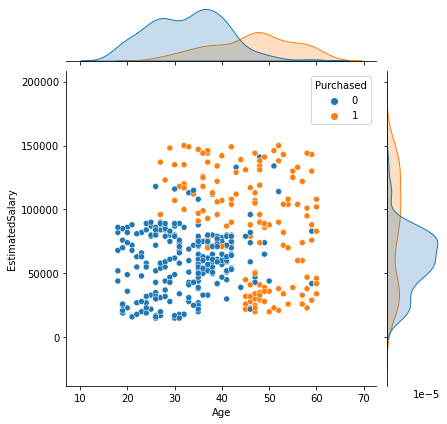

In [15]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df, hue = 'Purchased', kind= 'scatter');

In [16]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

Splitting the dataset into the Train set and Test set

In [19]:
#split x and y into traning and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
#check the shape of X_train,X_test.shape
X_train.shape,X_test.shape

((280, 2), (120, 2))

Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Trainng of naive Bayes models

In [28]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

Predicting the Test set results

In [34]:
Y_pred = classifier.predict(X_test)


Making cinfusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
print( 'Confusion Matrix of Naive Bayes Model:' '\n', confusion_matrix(y_test, Y_pred))


Confusion Matrix of Naive Bayes Model:
 [[74  5]
 [ 8 33]]


Generating the classification report

In [56]:
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Naive Bayes Model is ', accuracy_score(y_test, Y_pred))

print('\n', '\n','Classification Report for Naive Bayes Model:' '\n',classification_report(y_test, Y_pred))

Accuracy of Naive Bayes Model is  0.8916666666666667

 
 Classification Report for Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



Visualizing the Train set results

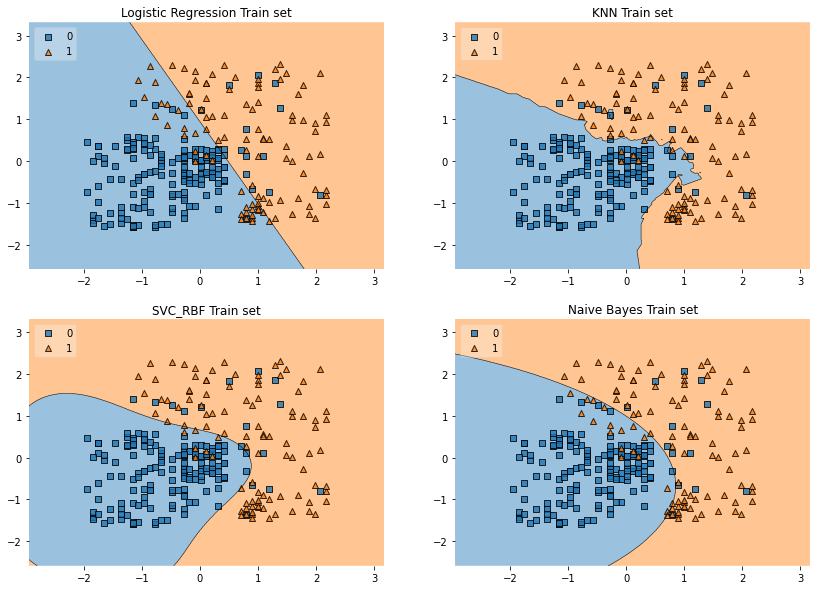

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression Train set', 'KNN Train set', 'SVC_RBF Train set','Naive Bayes Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

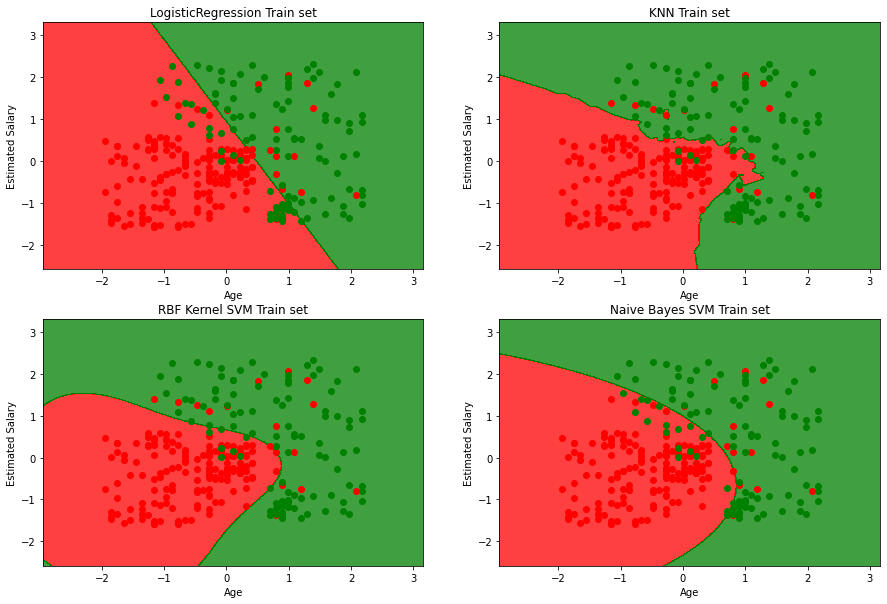

In [62]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4)) = plt.subplots(2, 2, figsize=(15,10))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes1.set_title('LogisticRegression Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes2.set_title('KNN Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes3.set_title('RBF Kernel SVM Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)))
axes4.set_title('Naive Bayes SVM Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')
plt.show()

Results and conclusion

In this project, I build a Gaussian Naïve Bayes Classifier  The model yields a very good performance as indicated by the model accuracy which was found to be 0.8916

References

1.Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2.Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3.Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

4.https://en.wikipedia.org/wiki/Naive_Bayes_classifier

5.http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/

6.https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

7.https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

8.https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html